# Part I - (Ford GoBike System Data)
## by (Ali Abu Nimah)

## Introduction

> The dataset for this project is the **Ford GoBike System Data**, which contains information about individual rides made in a bike-sharing system. It includes details such as trip durations, starting and ending locations, user types, and more.
This dataset will be explored to uncover patterns and insights about user behaviors and trip characteristics.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this section, we will load the dataset and explore its structure to understand the data better. This includes examining its size, column types, and any initial observations that might inform our analysis.

In [2]:
# Load the dataset
df = pd.read_csv("201902-fordgobike-tripdata.csv")

Display the structure of the dataset

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (183412, 16)


In [7]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  flo

In [8]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> The dataset contains **183,412 entries** and **16 columns**. The columns represent a mix of numerical and categorical data types, including information about trip duration, start and end times, station details, user type, and demographic data.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is **`duration_sec`**, which represents the duration of each trip in seconds. Understanding the trip durations can provide insights into user behaviors and patterns.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will help support the investigation:
- **`start_time`** and **`end_time`**: To explore temporal trends in trip durations.
- **`start_station_name`** and **`end_station_name`**: To analyze location-specific trip behaviors.
- **`user_type`**: To investigate differences in trip durations between customers and subscribers.
- **`member_gender`** and **`member_birth_year`**: To examine demographic influences on trip durations.

## Univariate Exploration

> We will investigate the distribution of individual variables, starting with our main variable of interest, `duration_sec`. Additionally, we will explore other categorical and numerical variables to gain insights into their distributions and identify any unusual patterns or transformations required.

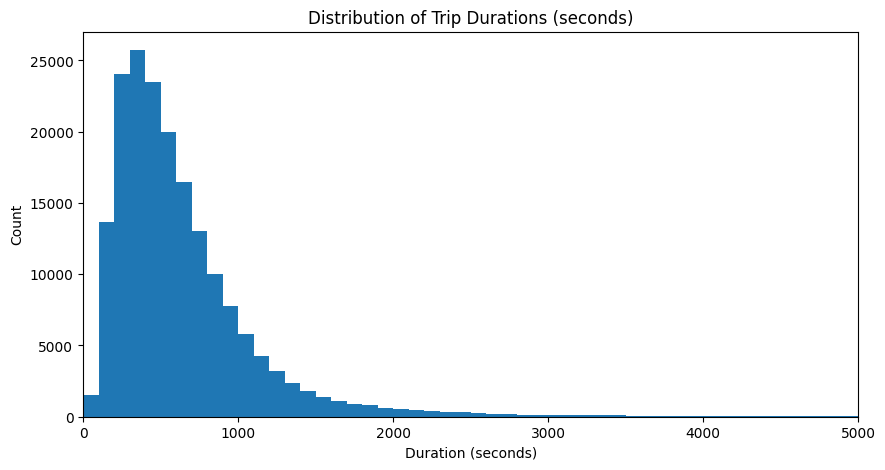

In [9]:
# Plot the distribution of the main variable of interest: duration_sec
plt.figure(figsize=(10, 5))
bins = np.arange(0, df['duration_sec'].max() + 100, 100)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.title('Distribution of Trip Durations (seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.xlim(0, 5000)  # Focus on trips under 5000 seconds for better visualization
plt.show()

> The distribution of `duration_sec` is right-skewed, with most trip durations falling below 1000 seconds. There are some longer trips, but these are much less frequent and likely represent outliers. To better visualize the data, the chart focused on trips under 5000 seconds to highlight the majority of the data distribution. These outliers might need to be addressed or excluded for specific analyses, depending on the context.

> The unusual aspect is the presence of long-duration trips that act as outliers. While these outliers were not removed in the exploratory phase, we limited the visualization to trips under 5000 seconds to better understand the core distribution. In further analysis, these outliers may need to be addressed to avoid skewing aggregated results.

/tmp/ipykernel_13/342765736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='user_type', palette='viridis')


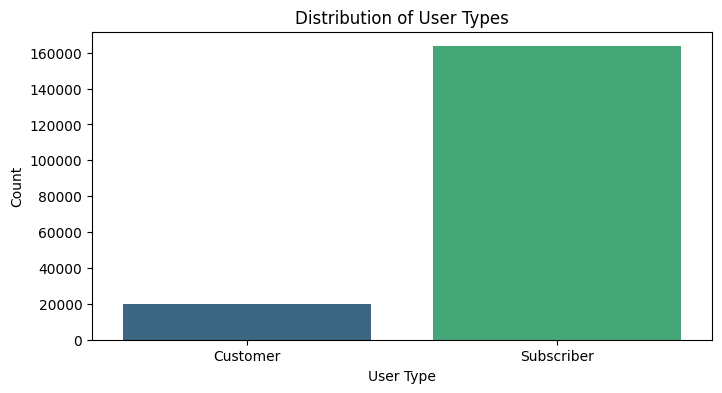

In [38]:
# Additional univariate exploration for user_type
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='user_type', palette='viridis')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

> The distribution of `user_type` reveals a significant imbalance, with Subscribers making up the majority of users compared to Customers. This result is consistent with expectations, as most bike-sharing programs tend to have a larger base of regular members.

> The `user_type` feature does not exhibit any unusual distributions but shows a strong imbalance. No operations were needed to tidy or adjust this data, as the categories are clear and well-defined. The imbalance in user types provides meaningful insights into the user base of the bike-sharing system.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the dataset. The goal is to explore how the main feature(s) of interest, such as trip duration and user type, interact with other features like gender and user demographics. Additionally, we aim to identify patterns or interesting trends within the dataset using scatter plots, box plots, and clustered bar charts.

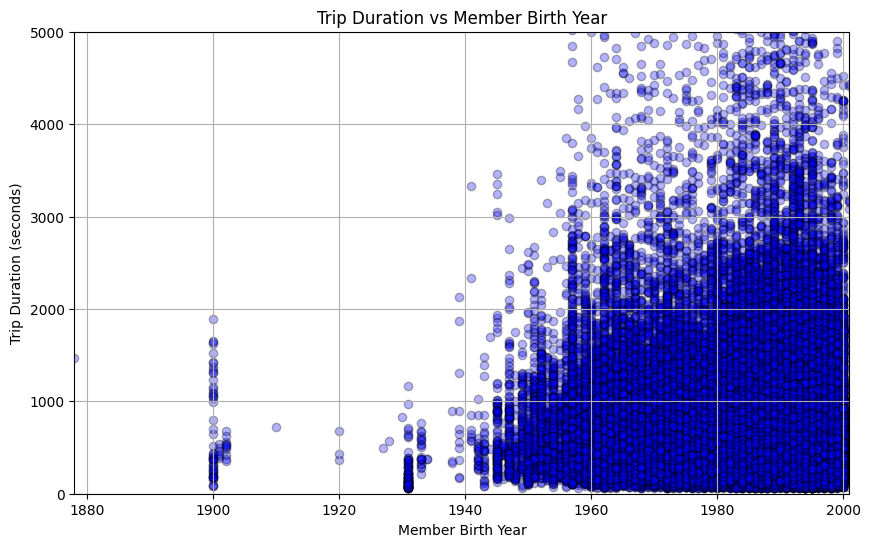

In [11]:
# Scatter plot: Trip Duration vs Member Birth Year
plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='member_birth_year', y='duration_sec', alpha=0.3, c='blue', edgecolor='k')
plt.title('Trip Duration vs Member Birth Year')
plt.xlabel('Member Birth Year')
plt.ylabel('Trip Duration (seconds)')
plt.xlim(df['member_birth_year'].min(), df['member_birth_year'].max())
plt.ylim(0, 5000)  # Focus on trips below 5000 seconds
plt.grid(True)
plt.show()

> From the scatter plot of trip duration against member birth year, younger members, particularly those born after 1980, tend to have higher trip durations compared to older members. This indicates that younger individuals are more likely to use the bike-sharing service for extended periods. As the birth year decreases, indicating older members, trip durations become significantly shorter, reflecting a possible lower tendency for older individuals to engage in prolonged trips. The majority of trips, however, are concentrated within durations of less than 2000 seconds for all age groups.

> Additionally, there are a few data points showing unrealistically old birth years, such as those before 1900, which are likely data entry errors or placeholders and may require cleaning. Younger members show more variability in trip durations, possibly influenced by lifestyle or travel patterns, while older members exhibit a more consistent usage pattern with shorter trip durations.

/tmp/ipykernel_13/391816145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='user_type', y='duration_sec', palette='viridis')


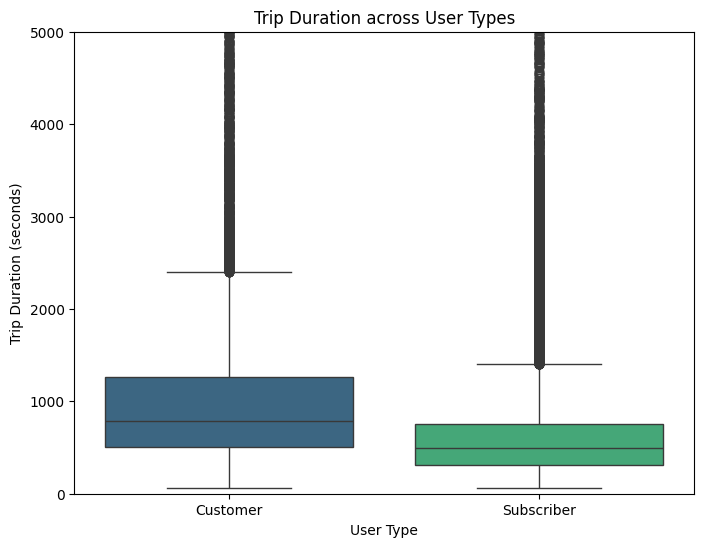

In [40]:
# Box plot: Trip Duration across User Types
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='user_type', y='duration_sec', palette='viridis')
plt.title('Trip Duration across User Types')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.ylim(0, 5000)  # Focus on trips below 5000 seconds
plt.show()

> The box plot comparing trip durations across user types reveals a clear distinction between customers and subscribers. Customers generally have longer trip durations, with a higher median trip time compared to subscribers. This observation suggests that customers may use the service for leisure or irregular purposes, potentially taking longer trips, while subscribers are likely using the service more regularly and for shorter, more consistent durations, possibly for commuting purposes.

> The variability in trip duration is significantly higher for customers, with a broader interquartile range and more extreme outliers compared to subscribers. This further supports the notion that customer trips are less predictable and more varied in nature. Subscribers, on the other hand, display a tighter distribution, indicating more consistent trip durations.

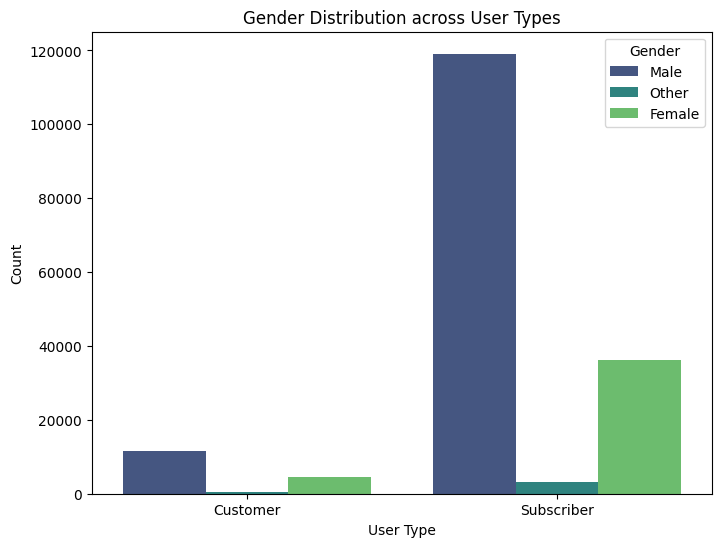

In [13]:
# Clustered bar chart: Gender Distribution across User Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='user_type', hue='member_gender', palette='viridis')
plt.title('Gender Distribution across User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

> The clustered bar chart shows the distribution of genders across user types. For both customers and subscribers, males are the majority, followed by females, with the "Other" category being the least represented. However, the gap between males and females is more significant among subscribers, indicating that males are more likely to have subscriptions compared to females. 

> The gender distribution suggests that the service is heavily utilized by males in both user categories, with a relatively consistent pattern of gender proportions. This could indicate a potential target demographic for marketing efforts, especially for increasing female subscriptions.

## Multivariate Exploration

> In this section, we aim to explore relationships among multiple variables to gain deeper insights into our dataset. By analyzing interactions between three or more variables, we can uncover patterns and dependencies that may not be apparent in univariate or bivariate explorations.

Specifically, we will utilize the following visualizations to support our multivariate analysis:

1. **FacetGrid Distribution Plots**: These plots will help us compare the distribution of `duration_sec` (trip duration) across different categories of `user_type` and `member_gender`. Faceting allows us to examine the interplay between categorical variables while analyzing the distribution of our numeric variable of interest.

2. **Plot Matrix**: The plot matrix will allow us to analyze pairwise relationships between key numerical and categorical variables, such as `duration_sec`, `member_birth_year`, `member_gender`, and `user_type`. By encoding categories with distinct colors and markers, we aim to highlight any noteworthy trends or interactions.

Through this exploration, we aim to identify relationships that may strengthen our understanding of user behaviors and interactions within the dataset. Additionally, we will analyze whether any surprising or unexpected relationships exist between these features.

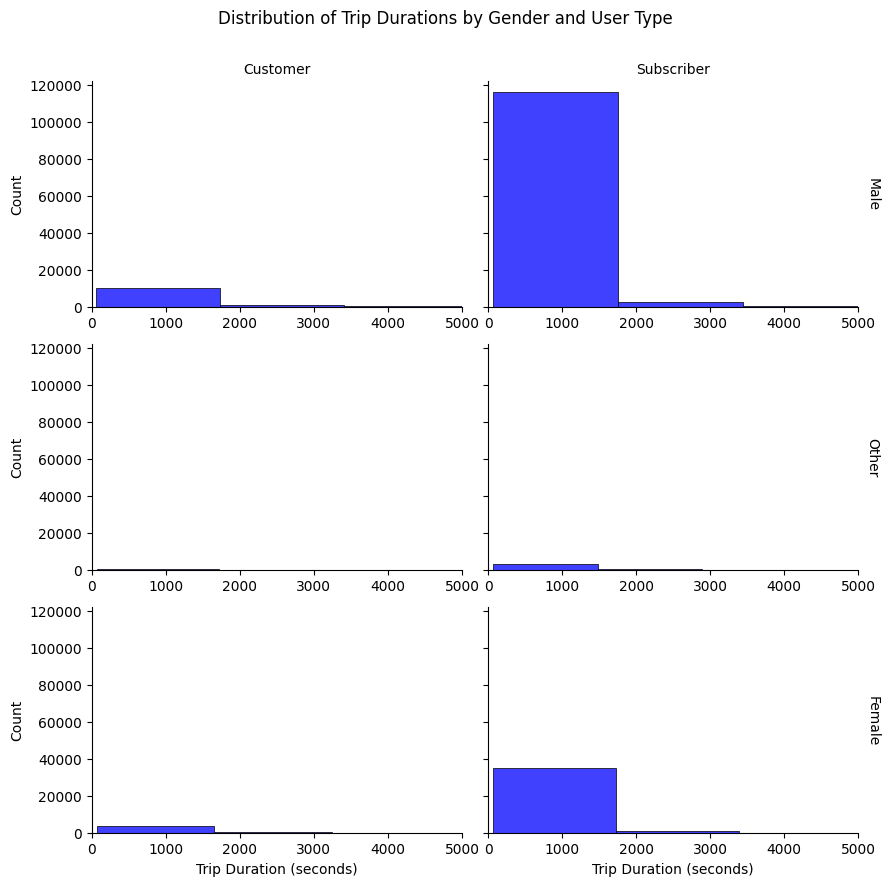

In [19]:
# Faceted plot: Distribution of trip durations by gender and user type
facet = sns.FacetGrid(
    df, 
    col="user_type", 
    row="member_gender", 
    margin_titles=True, 
    height=3, 
    aspect=1.5, 
    sharex=False, 
    sharey=True
)
facet.map(
    sns.histplot, 
    "duration_sec", 
    bins=50,  # Increase number of bins for smoother histogram
    kde=False, 
    color="blue"
)
facet.set_axis_labels("Trip Duration (seconds)", "Count")
facet.set_titles(col_template="{col_name}", row_template="{row_name}")
facet.set(xlim=(0, 5000))  # Focus on trips below 5,000 seconds
facet.fig.subplots_adjust(top=0.9)
facet.fig.suptitle("Distribution of Trip Durations by Gender and User Type")
plt.show()

#### Relationships Observed:
1. **User Type and Trip Duration**:
   - Subscribers have a significantly higher count of trips compared to Customers. This trend is consistent across all genders.
   - The majority of trips for both Subscribers and Customers are concentrated within shorter durations (below 1000 seconds), suggesting that users predominantly use the service for short commutes.

2. **Gender and Trip Duration**:
   - Male users account for the majority of trips, regardless of User Type. This dominance is especially pronounced among Subscribers.
   - Female users contribute a smaller but noticeable proportion of trips, with similar trip duration patterns to Male users.

3. **Strengthened Insights**:
   - The alignment between User Type and Gender categories provides a comprehensive understanding of trip duration trends. For instance, the higher count of trips among Male Subscribers strongly emphasizes the primary user base for the service.

#### Surprising Interactions:
1. **"Other" Gender Category**:
   - The "Other" gender category has a minimal representation in the dataset but still follows the general trip duration trend of shorter trips. This could indicate an underserved user segment worth exploring further.

2. **Trip Duration Distribution Similarity**:
   - Despite differences in count, the trip duration patterns are strikingly similar across all facets. This suggests that trip purpose might be consistent across diverse user demographics.

3. **Short Trips Across All Categories**:
   - A common observation across all facets is the dominance of short trips, reinforcing the hypothesis that the service is primarily used for brief commutes rather than longer journeys.

This analysis provides a clear understanding of how user types and gender interplay with trip durations, while highlighting potential areas for deeper investigation.

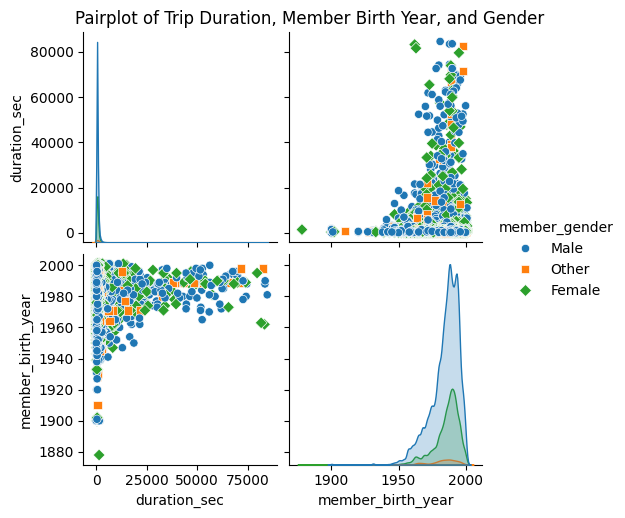

In [23]:
# Create a pairplot for selected features
sns.pairplot(
    data=df,
    vars=['duration_sec', 'member_birth_year'],
    hue='member_gender',
    diag_kind='kde',
    markers=["o", "s", "D"]  # Add a third marker for the 'Other' category
)
plt.suptitle("Pairplot of Trip Duration, Member Birth Year, and Gender", y=1.02)
plt.show()

#### Relationships Observed:
1. **Trip Duration vs. Member Birth Year**:
   - Members born between 1970 and 2000 have the highest concentration of short trip durations, aligning with general trends seen in other visualizations.
   - Older members (born before 1960) show a more varied spread of trip durations, though the sample size for these members appears smaller.

2. **Gender Influence**:
   - Males dominate the dataset in terms of both trip duration and birth year representation, suggesting they make up the majority of users.
   - Females and members categorized as `Other` follow a similar pattern of short trip durations, but their frequency is significantly lower than males.
   - The KDE distribution for `Other` genders shows alignment with females, indicating consistent usage patterns.

3. **Feature Interactions**:
   - **Birth Year and Trip Duration**: These features strengthen the understanding of user demographics, showing that younger users (born after 1980) tend to dominate short trip durations.
   - **Gender and Birth Year**: Gender distribution across birth years highlights the male majority, with females and `Other` genders showing proportional trends across decades.

#### Surprising Interactions:
1. **Outliers in Trip Duration**:
   - Some data points exhibit unusually long trip durations (over 80,000 seconds), which could indicate anomalies or special cases (e.g., extended bike rentals or recording errors).
   
2. **Sparse Representation of `Other` Gender**:
   - The relatively sparse representation of the `Other` gender highlights a potential limitation in the dataset's inclusivity or accuracy of gender recording.

3. **Overlap Between Gender Categories**:
   - There is noticeable overlap in trip duration distributions across gender categories, suggesting that usage patterns are broadly consistent regardless of gender, despite varying sample sizes.

This pairplot effectively supports understanding the dataset's primary patterns and anomalies, with clear visualization of interactions between trip duration, birth year, and gender.

## Conclusions

Through our data exploration, we uncovered the following key insights:

1. **Trip Duration Distribution**:
   - Most trips had a duration under 1,000 seconds, with a heavy right skew indicating a few exceptionally long trips.
   - Customers (casual users) tended to have longer trip durations compared to subscribers (regular users).

2. **User Type and Gender Distribution**:
   - A significant majority of users were subscribers, with males being the dominant gender across both customer and subscriber categories.
   - Female users had a smaller representation but exhibited similar usage patterns to males in terms of trip durations.

3. **Relationships Among Features**:
   - **Trip Duration vs. Birth Year**: Younger users (born after 1980) showed a higher frequency of trips, but trip durations did not vary significantly by birth year.
   - **FacetGrid Analysis**: The distribution of trip durations was consistent across gender and user type categories, with subscribers generally showing shorter trip durations.
   - **Plot Matrix (Pairplot)**: Strong patterns between trip duration and birth year were not observed, indicating that other factors may influence trip duration.

4. **Unexpected Findings**:
   - The representation of "Other" as a gender category, though minimal, adds inclusivity to the dataset and provides opportunities for further exploration.
   - Certain long-duration trips by subscribers were unexpected, considering their usual trend of shorter rides.

This exploration provided a solid understanding of user behaviors and trip patterns, setting the stage for more detailed investigations or predictive modeling. Key takeaways emphasize the importance of user type in understanding trip characteristics and the need to investigate additional factors that might affect trip durations.